Linear and Logistic distribution

Importing libraries

In [1]:
import numpy as np  # for linear algebra
import pandas as pd #  for data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization


In [2]:
from scipy.stats import norm 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from yellowbrick.regressor import PredictionError

Call the data and checking Dataset

In [4]:
df = pd.read_csv("data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [6]:
print('Data Info')
df.info()
 # checking no. of non_numerical coloumns

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dty

In [8]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [10]:
df.keys()

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [17]:
df.drop(columns=['bedrooms','bathrooms','condition','waterfront','statezip'])

,date,price,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,country
0,2014-05-02 00:00:00,3.130000e+05,1340,7912,1.5,0,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,USA
1,2014-05-02 00:00:00,2.384000e+06,3650,9050,2.0,4,3370,280,1921,0,709 W Blaine St,Seattle,USA
2,2014-05-02 00:00:00,3.420000e+05,1930,11947,1.0,0,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,USA
3,2014-05-02 00:00:00,4.200000e+05,2000,8030,1.0,0,1000,1000,1963,0,857 170th Pl NE,Bellevue,USA
4,2014-05-02 00:00:00,5.500000e+05,1940,10500,1.0,0,1140,800,1976,1992,9105 170th Ave NE,Redmond,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,1510,6360,1.0,0,1510,0,1954,1979,501 N 143rd St,Seattle,USA
4596,2014-07-09 00:00:00,5.343333e+05,1460,7573,2.0,0,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,USA
4597,2014-07-09 00:00:00,4.169042e+05,3010,7014,2.0,0,3010,0,2009,0,759 Ilwaco Pl NE,Renton,USA
4598,2014-07-10 00:00:00,2.034000e+05,2090,6630,1.0,0,1070,1020,1974,0,5148 S Creston St,Seattle,USA


In [11]:
#Dependent variable is Price

In [12]:
#Independent variables are
# 'sqft_living', 'sqft_lot','floors', 'view','sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'country

Performing EDA

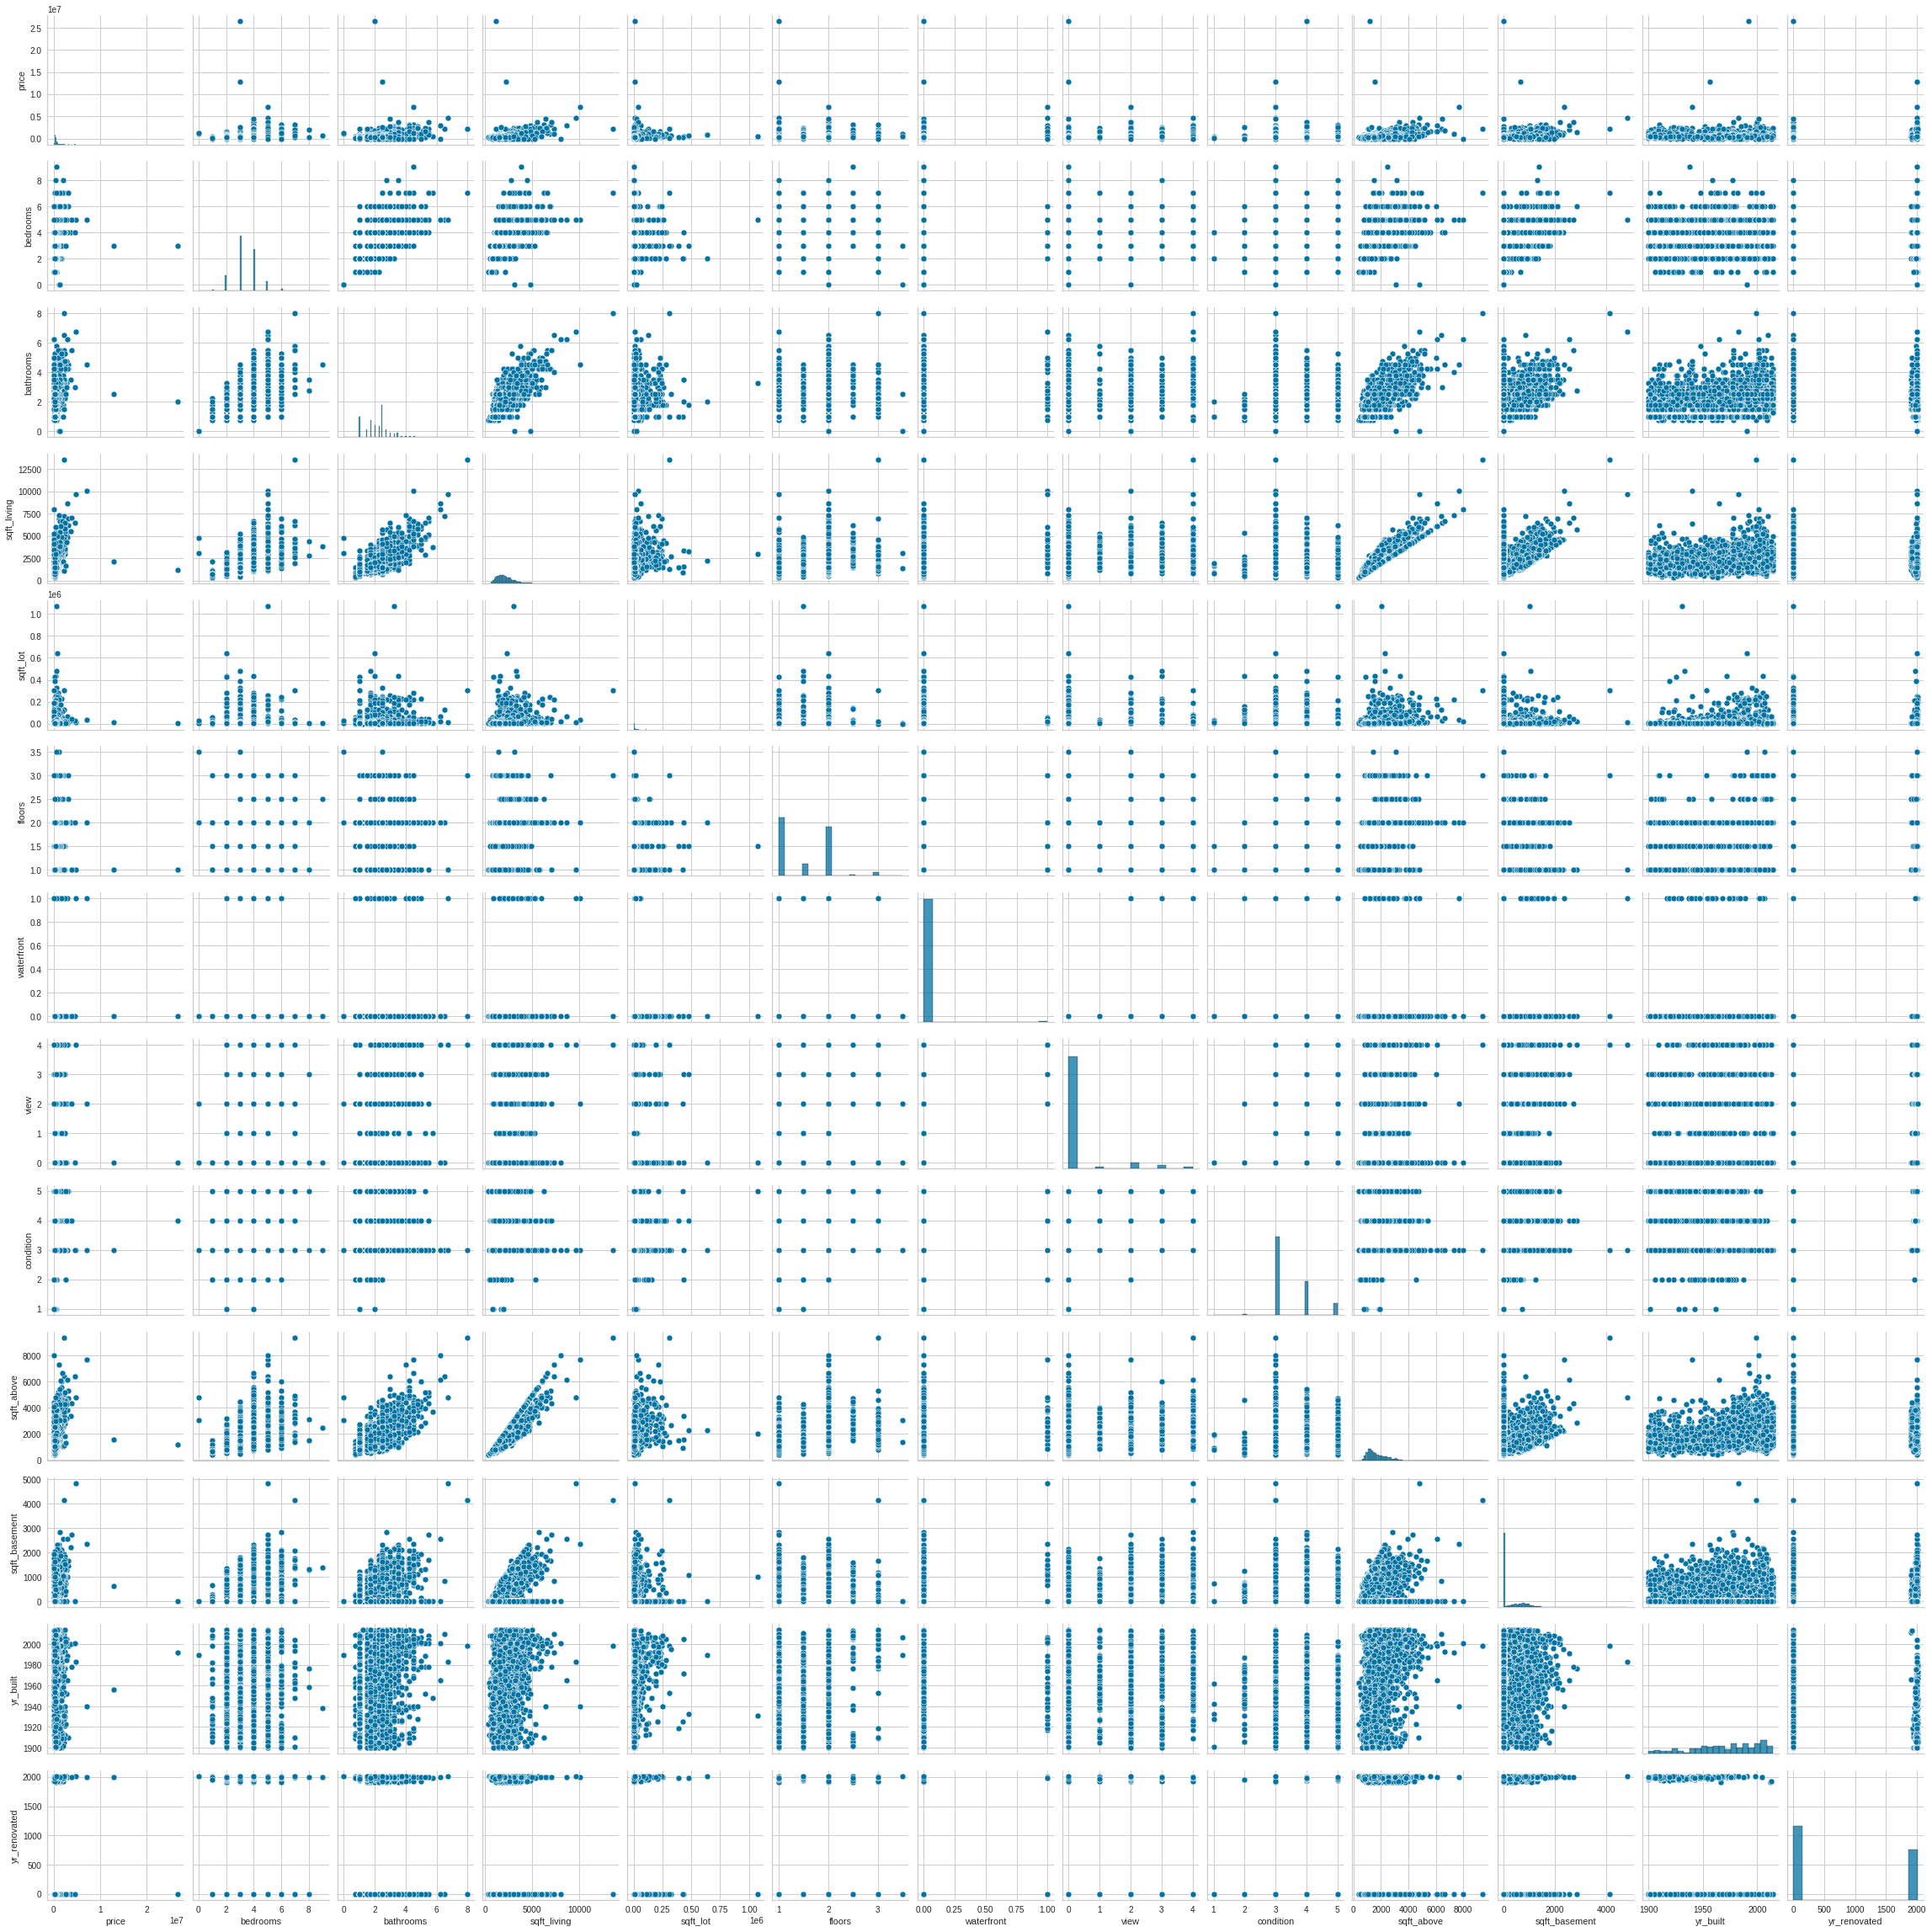

In [18]:
sns.pairplot(df)

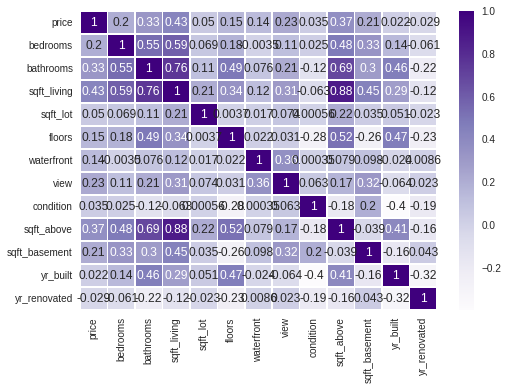

In [22]:

corr= df.corr()
sns.heatmap(corr, cmap='Purples',annot = True, linewidth=0.5)

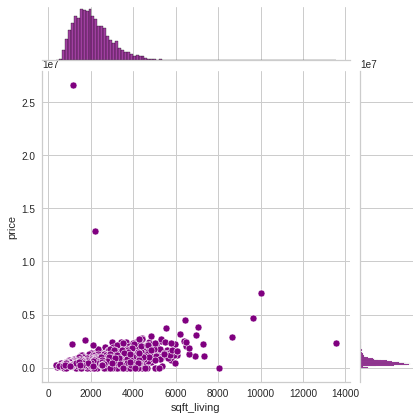

In [31]:
sns.jointplot(x='sqft_living',y='price', data=df, color='purple')

missing values

In [32]:
df.isnull().sum()
#there is no null values

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Modeling

In [33]:
from sklearn.preprocessing import LabelEncoder

In [39]:
#Encoding categorical features
street_le = LabelEncoder()
city_le = LabelEncoder()
country_le = LabelEncoder()
date_le = LabelEncoder()
statezip_le= LabelEncoder()

In [40]:
df['street'] = street_le.fit_transform(df['street'])
df['city'] = city_le.fit_transform(df['city'])
df['country'] = country_le.fit_transform(df['country'])
df['date'] = date_le.fit_transform(df['date'])
df['statezip']= statezip_le.fit_transform(df['statezip'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   int64  
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   int64  
 15  city           4600 non-null   int64  
 16  statezip       4600 non-null   int64  
 17  country        4600 non-null   int64  
dtypes: float

Linear Regression

In [42]:
x = df.drop('price', axis=1)
y = df.price

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

Creating the train model

In [56]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [57]:
print(lm.intercept_)

4443568.152886914


In [58]:
lm.coef_

array([ 5.38048768e+02, -5.01533950e+04,  5.21120772e+04,  1.55976564e+02,
       -6.25989420e-01,  3.64341466e+04,  2.47368650e+05,  5.77007934e+04,
        4.07781736e+04,  9.74994036e+01,  5.84771607e+01, -2.32897182e+03,
        1.00364547e+00, -5.08053121e+00,  3.31507094e+03, -1.71208991e+03,
        0.00000000e+00])

In [61]:
X_train.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country'],
      dtype='object')

test your data

In [66]:
pred=lm.predict(X_test)
pred

array([1389520.56058541,  547464.50555696,  461171.75524075, ...,
        455114.18429608,  438028.74534702,  277419.44090041])

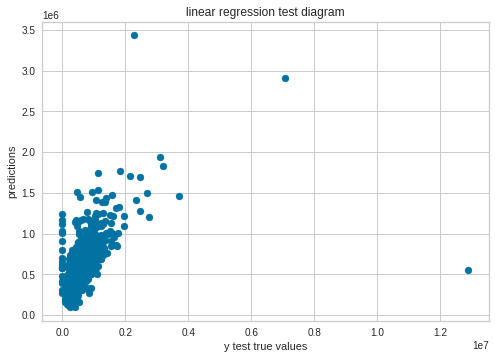

In [81]:
plt.scatter(y_test, pred)
plt.xlabel('y test true values')
plt.ylabel('predictions')
plt.title('linear regression test diagram')
plt.show()

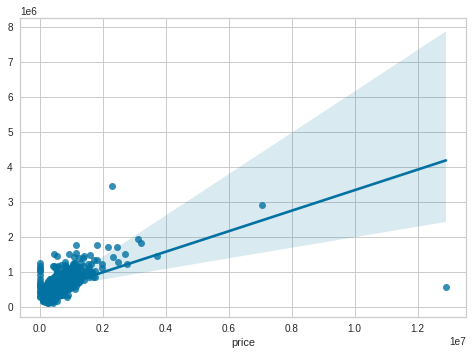

In [84]:
sns.regplot(x=y_test, y=pred, data=df)

Logistic Regression

import libraries 

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix


call the data

In [86]:
from sklearn.datasets import load_wine
wine=load_wine()
wine


{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [88]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [93]:
Dataframe=pd.DataFrame(wine['data'],columns=wine['feature_names'])
Dataframe['y_varaible'] =wine['target']

In [94]:
Dataframe.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y_varaible
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [95]:
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  y_var

EDA

In [103]:
plt.figure(figsize=(12,6))
corr_2= Dataframe.corr()


<Figure size 864x432 with 0 Axes>

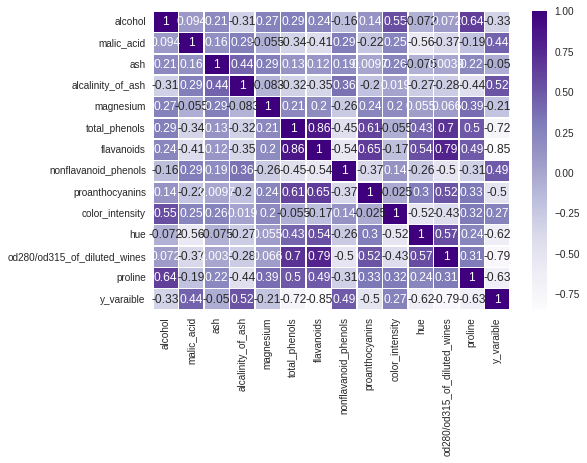

In [109]:
sns.heatmap(corr_2, cmap='Purples',annot = True, linewidth=0.5)



train the model

In [110]:
x= Dataframe.drop('y_varaible',axis=1)
y= Dataframe['y_varaible']
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=101)

In [111]:
LogR=LogisticRegression()
LogR.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

test the data

In [112]:
pred_1=LogR.predict(x_test)
pred_1

array([0, 0, 2, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2,
       2, 2, 0, 0, 1, 1, 2, 1, 2, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0,
       2, 1, 1, 2, 2, 1, 0, 1, 1, 0])

In [113]:
print(classification_report(y_test,pred_1))
print("\n")
print(confusion_matrix(y_test,pred_1))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.91      0.91      0.91        22
           2       0.92      0.92      0.92        13

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



[[18  1  0]
 [ 1 20  1]
 [ 0  1 12]]
